<a href="https://colab.research.google.com/github/anthony0727/ml2_takehome/blob/master/notebook/lenet5_benchmark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!apt-get install apache2-utils

[sudo] password for anthony: 
[sudo] password for anthony: 

In [ ]:
import requests
import matplotlib.pyplot as plt
from pprint import PrettyPrinter
import json
import numpy as np
pp = PrettyPrinter()

### load data

In [ ]:
from tensorflow.keras.datasets.mnist import load_data

(train_x, train_y), (test_x, test_y) = load_data()

### tensorflow/serving

In [ ]:
sample = test_x[:1]

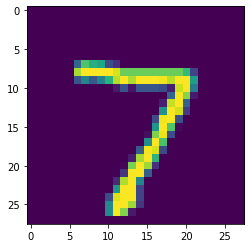

In [ ]:
plt.imshow(sample[0])

In [ ]:
data = json.dumps({"signature_name": "serving_default", "instances": np.expand_dims(sample, axis=-1).tolist()})

In [ ]:
res = json.loads(requests.post('http://ec2-3-35-42-27.ap-northeast-2.compute.amazonaws.com:8501/v1/models/lenet5:predict', data=data).text)

In [ ]:
predictions = res['predictions']

In [ ]:
np.argmax(predictions)

7

### benchmark

n requests

c concurrency

In [ ]:
!ab -k -l -n 10000 -c 1000 -T "image/ong" -p test_data/0.png http://ec2-3-35-42-27.ap-northeast-2.compute.amazonaws.com:8501/v1/models/lenet5:predict

This is ApacheBench, Version 2.3 <$Revision: 1843412 $>
Copyright 1996 Adam Twiss, Zeus Technology Ltd, http://www.zeustech.net/
Licensed to The Apache Software Foundation, http://www.apache.org/

Benchmarking ec2-3-35-42-27.ap-northeast-2.compute.amazonaws.com (be patient)
Completed 1000 requests
Completed 2000 requests
Completed 3000 requests
Completed 4000 requests
Completed 5000 requests
Completed 6000 requests
Completed 7000 requests
Completed 8000 requests
Completed 9000 requests
Completed 10000 requests
Finished 10000 requests


Server Software:        
Server Hostname:        ec2-3-35-42-27.ap-northeast-2.compute.amazonaws.com
Server Port:            8501

Document Path:          /v1/models/lenet5:predict
Document Length:        Variable

Concurrency Level:      1000
Time taken for tests:   1.060 seconds
Complete requests:      10000
Failed requests:        0
Non-2xx responses:      10000
Keep-Alive requests:    10000
Total transferred:      1680000 bytes
Total body sent:      

### pytorch/torchserve

In [ ]:
res = requests.get('http://ec2-3-35-42-27.ap-northeast-2.compute.amazonaws.com:8082/models/lenet5')

In [ ]:
json.loads(res.text)

[{'modelName': 'lenet5',
  'modelVersion': '1.0',
  'modelUrl': 'lenet5.mar',
  'runtime': 'python',
  'minWorkers': 8,
  'maxWorkers': 8,
  'batchSize': 1,
  'maxBatchDelay': 100,
  'loadedAtStartup': True,
  'workers': [{'id': '9000',
    'startTime': '2020-09-07T15:42:23.017Z',
    'status': 'READY',
    'gpu': False,
    'memoryUsage': 169103360},
   {'id': '9001',
    'startTime': '2020-09-07T15:42:23.019Z',
    'status': 'READY',
    'gpu': False,
    'memoryUsage': 169496576},
   {'id': '9002',
    'startTime': '2020-09-07T15:42:23.020Z',
    'status': 'READY',
    'gpu': False,
    'memoryUsage': 169328640},
   {'id': '9003',
    'startTime': '2020-09-07T15:42:23.020Z',
    'status': 'READY',
    'gpu': False,
    'memoryUsage': 168558592},
   {'id': '9004',
    'startTime': '2020-09-07T15:42:23.020Z',
    'status': 'READY',
    'gpu': False,
    'memoryUsage': 169418752},
   {'id': '9005',
    'startTime': '2020-09-07T15:42:23.020Z',
    'status': 'READY',
    'gpu': False,
  

In [ ]:
sample = test_x[:1]

(1, 28, 28, 1)

In [ ]:
res = json.loads(requests.post('http://ec2-3-35-42-27.ap-northeast-2.compute.amazonaws.com:8081/predictions/lenet5', files={'media': 'test_data/0.png'}).text)

In [ ]:
res

{'code': 503,
 'type': 'InternalServerException',
 'message': 'Prediction failed'}

In [ ]:
!curl -X POST http://ec2-3-35-42-27.ap-northeast-2.compute.amazonaws.com:8081/predictions/lenet5 -T test_data/0.png

{
  "code": 503,
  "type": "InternalServerException",
  "message": "Prediction failed"
}
